In [1]:
# %%
# Block D1.
# module
import os
import pathlib
import pickle
import pandas as pd
import numpy as np
import scipy.stats
import math
import matplotlib.pyplot as plt
print("done reading external module")

done reading external module


In [2]:
# %%
# Block D2
# os.chdir('/home/user01/Documents/project/suzuki_analytics/phase_2/notebooks')
strCurrentDirectory = os.getcwd()
print(strCurrentDirectory)

# "notebooks"ディレクトリよりも一階層上にいる場合はNotebooksフォルダに移動
if (strCurrentDirectory[-len("notebooks"):] != "notebooks") and (any("notebooks" in s for s in os.listdir())):
    os.chdir('notebooks')
    strCurrentDirectory = os.getcwd()
    print("notebooksフォルダの一階層上にいたのでnotebooksフォルダに移動しました。")

if strCurrentDirectory[-len("notebooks"):] == "notebooks":
    print("正常。作業ディレクトリがnotebooksフォルダに設定されています。")
else:
    print("エラー。作業ディレクトリがnotebooks以外に設定されています！現在の作業ディレクトリは" + strCurrentDirectory)

/home/user01/Documents/project/suzuki_analytics/phase_2/notebooks
正常。作業ディレクトリがnotebooksフォルダに設定されています。


In [3]:
# %%
# Block D3
import subject2initial

done reading initial file
done


In [4]:
# %% 
# Block D4. 初期状態を読み込み
print(subject2initial.strInitialTest)

PATH_DATA_INT = subject2initial.funIsDirMakeDir(strPath="../data/interim/")
PATH_DATA_PRO = subject2initial.funIsDirMakeDir(strPath="../data/processed/")
PATH_DATA_PRO_SUB2 = subject2initial.funIsDirMakeDir(
    strPath="../data/processed/subject02/")
PATH_DATA_PRO_SUB2_PKL = subject2initial.funIsDirMakeDir(
    strPath="../data/processed/subject02/pickle")

threPacCut = subject2initial.threPacCut
print(threPacCut)

イニシャルファイルからのテキスト読み込み
0.95


In [5]:
# %% 
# Block D5. オブジェクトをピクルスで読み込み

lsPdCanThisFeature = subject2initial.pickleReadOne(strObj="lsPdCanThisFeature", myPathlib = PATH_DATA_PRO_SUB2_PKL)
lsNpCanResampled = subject2initial.pickleReadOne(strObj="lsNpCanResampled", myPathlib = PATH_DATA_PRO_SUB2_PKL)
timeSeriesStart2End = subject2initial.pickleReadOne(strObj="timeSeriesStart2End", myPathlib = PATH_DATA_PRO_SUB2_PKL)
lsNamesFeatureMultiVal = subject2initial.pickleReadOne(strObj="lsNamesFeatureMultiVal", myPathlib = PATH_DATA_PRO_SUB2_PKL)
lsTsPacf = subject2initial.pickleReadOne(strObj="lsTsPacf", myPathlib = PATH_DATA_PRO_SUB2_PKL)
pdFeatureProfile = subject2initial.pickleReadOne(strObj="pdFeatureProfile", myPathlib = PATH_DATA_PRO_SUB2_PKL)
pdPacfAcrossFeatures = subject2initial.pickleReadOne(strObj="pdPacfAcrossFeatures", myPathlib = PATH_DATA_PRO_SUB2_PKL)
dfCorr87 = subject2initial.pickleReadOne(strObj="dfCorr87", myPathlib = PATH_DATA_PRO_SUB2_PKL)
vecRowMaxCorr87LowCorr = subject2initial.pickleReadOne(strObj="vecRowMaxCorr87LowCorr", myPathlib = PATH_DATA_PRO_SUB2_PKL)
lsNamesFeatureLowPac = subject2initial.pickleReadOne(strObj="lsNamesFeatureLowPac", myPathlib = PATH_DATA_PRO_SUB2_PKL)
dfCorrTriUpper87 = subject2initial.pickleReadOne(strObj="dfCorrTriUpper87", myPathlib = PATH_DATA_PRO_SUB2_PKL)

lsPdCanThisFeature[1].head()
pdFeatureProfile.head()
lsNpCanResampled[1][:10]
timeSeriesStart2End[:10]
lsNamesFeatureMultiVal[:10]
len(lsTsPacf)
lsTsPacf[0]

lenNamesFeatureMultiVal = len(lsNamesFeatureMultiVal)

print("done")

done


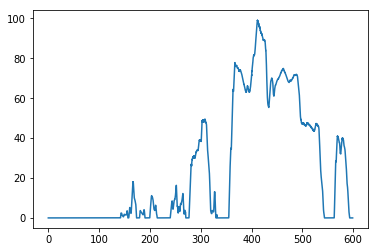

In [6]:
# %%
# Block D6. 速度抽出、微分、標準化
indSpeed = np.where(np.array(lsNamesFeatureMultiVal) == "31417")[0][0]
npArraySpeed = lsNpCanResampled[indSpeed]
plt.plot(timeSeriesStart2End, npArraySpeed)

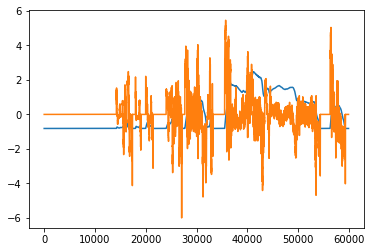

In [7]:
# %%
# Block D7. 微分
npArrayKasoku = np.diff(npArraySpeed)
npArrayKasoku = np.insert(arr=npArrayKasoku ,obj= 0, values=npArrayKasoku[0] )

# 速度と微分を一つのArrayに束ねる
npArraySpeedKasoku = np.c_[npArraySpeed, npArrayKasoku]
npArraySpeedKasoku = scipy.stats.zscore(npArraySpeedKasoku, axis = 0)

plt.plot(npArraySpeedKasoku)

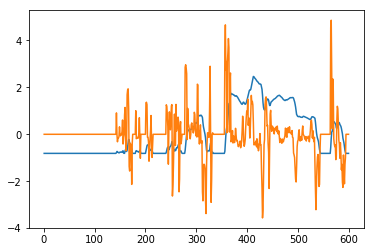

In [8]:
# %%
# Block D8. 1秒毎にまとめる
npSpeedKasokuMilliSec = np.c_[timeSeriesStart2End, npArraySpeedKasoku ] 
npSpeedKasokuMilliSec[:10]
pdSpeedKasokuMilliSec = pd.DataFrame(npSpeedKasokuMilliSec)
pdSpeedKasokuMilliSec['timeCeilSec'] = [ math.ceil(i) for i in npSpeedKasokuMilliSec[:,0] ]
pdSpeedKasokuMilliSec.head()

pdSpeedKasokuSec = pdSpeedKasokuMilliSec.groupby('timeCeilSec').median()
pdSpeedKasokuSec.head()
pdSpeedKasokuSec.columns = ['time', 'speed', "kasoku"]
pdSpeedKasokuSec = pdSpeedKasokuSec.drop("time", axis=1)
plt.plot(pdSpeedKasokuSec)

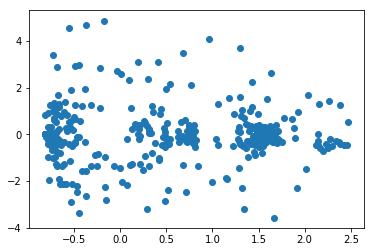

In [9]:
# %%
# Block D9. 
plt.scatter(pdSpeedKasokuSec.iloc[:,0], pdSpeedKasokuSec.iloc[:,1])




# %%



# %%



#